In [347]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('Sub4_wH_C1R_data.csv')
df.shape #get the rows and columns 

(1459, 6)

In [350]:

df = df.rename(columns={ df.columns[0]: "PSD1", df.columns[1]: "PSD2",df.columns[2]: "PSD3",df.columns[3]: "PSD4",df.columns[4]: "PSD5", df.columns[5]: "Labels"})


In [351]:
df_new = df.sample(frac=1).reset_index()
df_new.head(10)


,index,PSD1,PSD2,PSD3,PSD4,PSD5,Labels
0,1366,9.680094e+10,1.034218e+11,1.107504e+11,1.188912e+11,1.279672e+11,2
1,699,1.812485e+10,1.937494e+10,2.076028e+10,2.230079e+10,2.402101e+10,1
2,1394,5.297553e+10,5.660764e+10,6.062956e+10,6.509901e+10,7.008381e+10,2
3,604,4.712447e+09,5.034979e+09,5.391995e+09,5.788671e+09,6.230979e+09,1
4,1023,3.722826e+02,3.952954e+02,4.293201e+02,4.528388e+02,4.938437e+02,2
5,1071,1.623016e+02,1.727444e+02,1.838255e+02,2.046840e+02,2.256810e+02,2
6,783,1.446622e-01,1.481954e-01,1.868935e-02,5.037652e-01,3.109086e-02,2
7,1201,1.120793e+07,1.197611e+07,1.282283e+07,1.376732e+07,1.481817e+07,2
8,183,1.026747e-01,1.810205e-01,7.073233e-02,1.246898e-01,9.040105e-02,1
9,1133,5.562087e+05,5.938949e+05,6.363274e+05,6.827169e+05,7.353340e+05,2


In [352]:
df_new['Labels'].value_counts()


2    730
1    729
Name: Labels, dtype: int64

In [382]:
#split into two data sets, input and output data set
X = df.drop(columns = 'Labels', axis = 1)
y = df['Labels']

In [383]:
X.head(10)
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Labels, dtype: int64

In [365]:
#X = X.values.reshape(-1, 1)


In [366]:
#y = y.values.reshape(-1,1)

In [384]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [385]:
print(X.shape, X_train.shape, X_test.shape)

(1459, 5) (1167, 5) (292, 5)


In [386]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [387]:
#training the model 

# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

In [388]:
classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [389]:
predictions = classifier.predict(X_test)

In [390]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  16
False Positive(FP) =  0
True Negative(TN)  =  146
False Negative(FN) =  130


In [391]:
accuracy =  ((TP + TN) / (TP + FP + TN + FN))*100

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 55.479


In [392]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=10)

from sklearn.ensemble import AdaBoostClassifier
models['Ada Boost Classifier'] = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

In [393]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [394]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = (accuracy.values())
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.523973,0.938356,0.513109
Support Vector Machines,0.513699,0.938356,0.507407
Decision Trees,0.551370,0.993151,0.527273
Random Forest,0.551370,0.993151,0.527273
Naive Bayes,0.489726,0.938356,0.494585
K-Nearest Neighbor,0.558219,0.157534,0.793103
Ada Boost Classifier,0.554795,1.000000,0.528986


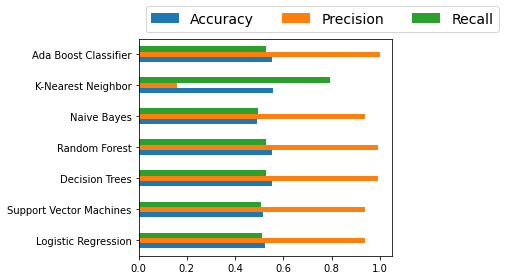

In [395]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()
